In [1]:
%matplotlib inline

<div class="document" id="rank-filters">
<h1 class="title">Rank filters</h1>
<p>Rank filters are non-linear filters using the local gray-level ordering to
compute the filtered value. This ensemble of filters share a common base: the
local gray-level histogram is computed on the neighborhood of a pixel (defined
by a 2-D structuring element). If the filtered value is taken as the middle
value of the histogram, we get the classical median filter.</p>
<p>Rank filters can be used for several purposes such as:</p>
<ul class="simple">
<li>image quality enhancement
e.g. image smoothing, sharpening</li>
<li>image pre-processing
e.g. noise reduction, contrast enhancement</li>
<li>feature extraction
e.g. border detection, isolated point detection</li>
<li>post-processing
e.g. small object removal, object grouping, contour smoothing</li>
</ul>
<p>Some well known filters are specific cases of rank filters [1] e.g.
morphological dilation, morphological erosion, median filters.</p>
<p>In this example, we will see how to filter a gray-level image using some of the
linear and non-linear filters available in skimage. We use the <cite>camera</cite> image
from <cite>skimage.data</cite> for all comparisons.</p>
<table class="docutils footnote" frame="void" id="id1" rules="none">
<colgroup><col class="label" /><col /></colgroup>
<tbody valign="top">
<tr><td class="label">[1]</td><td>Pierre Soille, On morphological operators based on rank filters, Pattern
Recognition 35 (2002) 527-535.</td></tr>
</tbody>
</table>
</div>


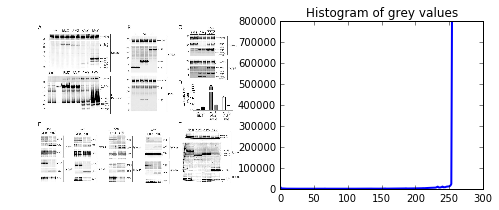

In [3]:

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage import data

noisy_image = data.imread('Comp.jpg',as_grey=True)

#noisy_image = img_as_ubyte(data.camera())
hist = np.histogram(noisy_image, bins=np.arange(0, 256))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.imshow(noisy_image, interpolation='nearest', cmap=plt.cm.gray)
ax1.axis('off')
ax2.plot(hist[1][:-1], hist[0], lw=2)
ax2.set_title('Histogram of grey values')



<div class="document" id="noise-removal">
<h1 class="title">Noise removal</h1>
<p>Some noise is added to the image, 1% of pixels are randomly set to 255, 1% are
randomly set to 0. The <strong>median</strong> filter is applied to remove the noise.</p>
</div>


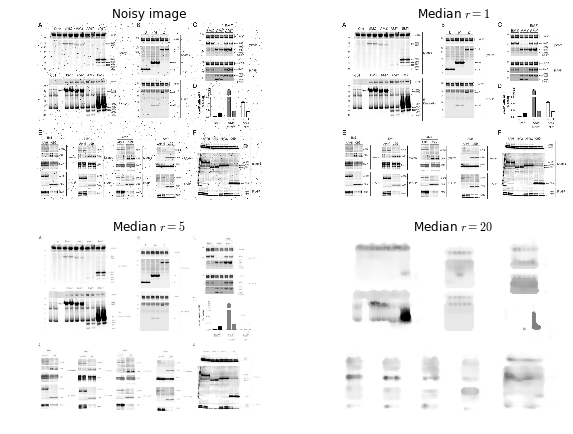

In [8]:

from skimage.filters.rank import median
from skimage.morphology import disk

noisy_image = data.imread('Comp.jpg',as_grey=True)
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

fig, ax = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax1.set_title('Noisy image')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(median(noisy_image, disk(1)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax2.set_title('Median $r=1$')
ax2.axis('off')
ax2.set_adjustable('box-forced')


ax3.imshow(median(noisy_image, disk(5)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax3.set_title('Median $r=5$')
ax3.axis('off')
ax3.set_adjustable('box-forced')


ax4.imshow(median(noisy_image, disk(20)), vmin=0, vmax=255, cmap=plt.cm.gray)
ax4.set_title('Median $r=20$')
ax4.axis('off')
ax4.set_adjustable('box-forced')




<div class="document">
<p>The added noise is efficiently removed, as the image defaults are small (1
pixel wide), a small filter radius is sufficient. As the radius is increasing,
objects with bigger sizes are filtered as well, such as the camera tripod. The
median filter is often used for noise removal because borders are preserved and
e.g. salt and pepper noise typically does not distort the gray-level.</p>
<div class="section" id="image-smoothing">
<h1>Image smoothing</h1>
<p>The example hereunder shows how a local <strong>mean</strong> filter smooths the camera man
image.</p>
</div>
</div>


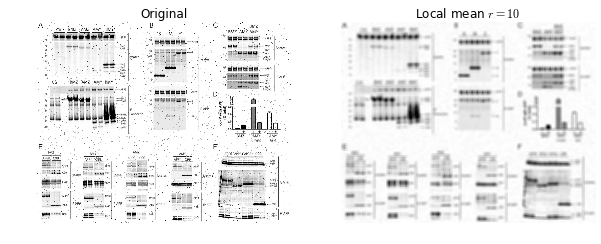

In [9]:

from skimage.filters.rank import mean

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 7], sharex=True, sharey=True)

loc_mean = mean(noisy_image, disk(10))

ax1.imshow(noisy_image, vmin=0, vmax=255, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(loc_mean, vmin=0, vmax=255, cmap=plt.cm.gray)
ax2.set_title('Local mean $r=10$')
ax2.axis('off')
ax2.set_adjustable('box-forced')



<div class="document">
<p>One may be interested in smoothing an image while preserving important borders
(median filters already achieved this), here we use the <strong>bilateral</strong> filter
that restricts the local neighborhood to pixel having a gray-level similar to
the central one.</p>
<div class="note">
<p class="first admonition-title">Note</p>
<p class="last">A different implementation is available for color images in
<cite>skimage.filters.denoise_bilateral</cite>.</p>
</div>
</div>


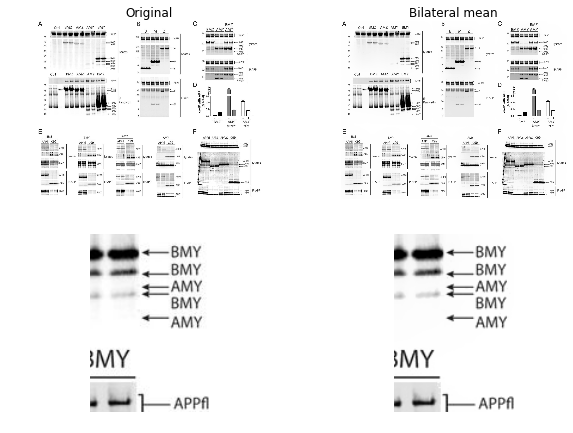

In [13]:

from skimage.filters.rank import mean_bilateral

noisy_image = data.imread('Comp.jpg',as_grey=True)

bilat = mean_bilateral(noisy_image.astype(np.uint16), disk(50), s0=20, s1=20)

fig, ax = plt.subplots(2, 2, figsize=(10, 7), sharex='row', sharey='row')
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(noisy_image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(bilat, cmap=plt.cm.gray)
ax2.set_title('Bilateral mean')
ax2.axis('off')
ax2.set_adjustable('box-forced')

ax3.imshow(noisy_image[200:350, 350:450], cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_adjustable('box-forced')

ax4.imshow(bilat[200:350, 350:450], cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_adjustable('box-forced')



<div class="document">
<p>One can see that the large continuous part of the image (e.g. sky) is smoothed
whereas other details are preserved.</p>
<div class="section" id="contrast-enhancement">
<h1>Contrast enhancement</h1>
<p>We compare here how the global histogram equalization is applied locally.</p>
<p>The equalized image <a class="footnote-reference" href="#id3" id="id1">[2]</a> has a roughly linear cumulative distribution function
for each pixel neighborhood. The local version <a class="footnote-reference" href="#id4" id="id2">[3]</a> of the histogram
equalization emphasizes every local gray-level variations.</p>
<table class="docutils footnote" frame="void" id="id3" rules="none">
<colgroup><col class="label" /><col /></colgroup>
<tbody valign="top">
<tr><td class="label"><a class="fn-backref" href="#id1">[2]</a></td><td><a class="reference external" href="http://en.wikipedia.org/wiki/Histogram_equalization">http://en.wikipedia.org/wiki/Histogram_equalization</a></td></tr>
</tbody>
</table>
<table class="docutils footnote" frame="void" id="id4" rules="none">
<colgroup><col class="label" /><col /></colgroup>
<tbody valign="top">
<tr><td class="label"><a class="fn-backref" href="#id2">[3]</a></td><td><a class="reference external" href="http://en.wikipedia.org/wiki/Adaptive_histogram_equalization">http://en.wikipedia.org/wiki/Adaptive_histogram_equalization</a></td></tr>
</tbody>
</table>
</div>
</div>


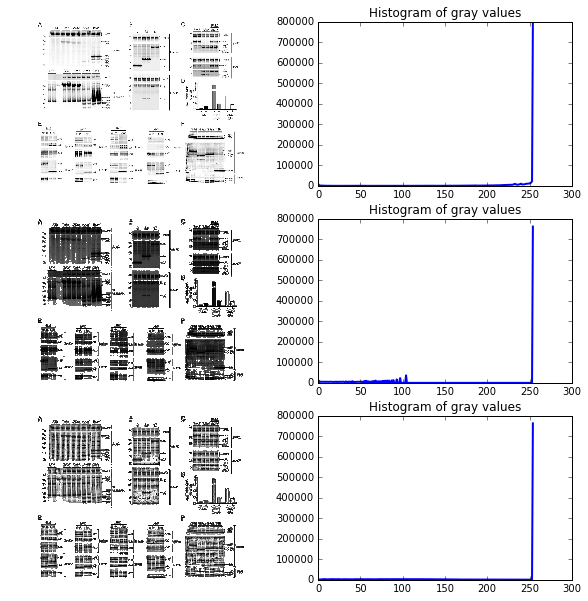

In [14]:

from skimage import exposure
from skimage.filters import rank

noisy_image = data.imread('Comp.jpg',as_grey=True)

# equalize globally and locally
glob = exposure.equalize_hist(noisy_image) * 255
loc = rank.equalize(noisy_image, disk(20))

# extract histogram for each image
hist = np.histogram(noisy_image, bins=np.arange(0, 256))
glob_hist = np.histogram(glob, bins=np.arange(0, 256))
loc_hist = np.histogram(loc, bins=np.arange(0, 256))

fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax1, ax2, ax3, ax4, ax5, ax6 = ax.ravel()

ax1.imshow(noisy_image, interpolation='nearest', cmap=plt.cm.gray)
ax1.axis('off')

ax2.plot(hist[1][:-1], hist[0], lw=2)
ax2.set_title('Histogram of gray values')

ax3.imshow(glob, interpolation='nearest', cmap=plt.cm.gray)
ax3.axis('off')

ax4.plot(glob_hist[1][:-1], glob_hist[0], lw=2)
ax4.set_title('Histogram of gray values')

ax5.imshow(loc, interpolation='nearest', cmap=plt.cm.gray)
ax5.axis('off')

ax6.plot(loc_hist[1][:-1], loc_hist[0], lw=2)
ax6.set_title('Histogram of gray values')



<div class="document">
<p>Another way to maximize the number of gray-levels used for an image is to apply
a local auto-leveling, i.e. the gray-value of a pixel is proportionally
remapped between local minimum and local maximum.</p>
<p>The following example shows how local auto-level enhances the camara man
picture.</p>
</div>


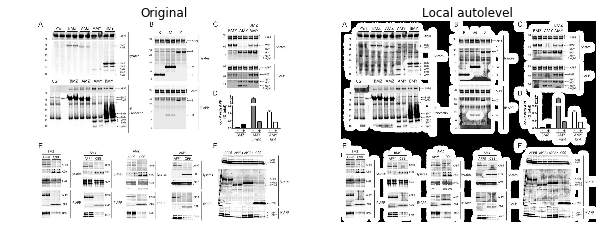

In [15]:

from skimage.filters.rank import autolevel

noisy_image = data.imread('Comp.jpg',as_grey=True)

auto = autolevel(noisy_image.astype(np.uint16), disk(20))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 7], sharex=True, sharey=True)

ax1.imshow(noisy_image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(auto, cmap=plt.cm.gray)
ax2.set_title('Local autolevel')
ax2.axis('off')
ax2.set_adjustable('box-forced')



<div class="document">
<p>This filter is very sensitive to local outliers, see the little white spot in
the left part of the sky. This is due to a local maximum which is very high
comparing to the rest of the neighborhood. One can moderate this using the
percentile version of the auto-level filter which uses given percentiles (one
inferior, one superior) in place of local minimum and maximum. The example
below illustrates how the percentile parameters influence the local auto-level
result.</p>
</div>


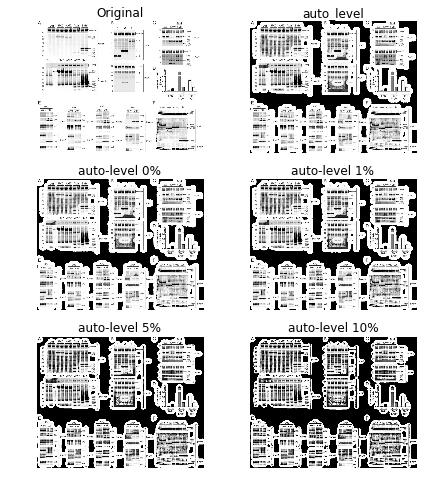

In [17]:

from skimage.filters.rank import autolevel_percentile

image = data.imread('Comp.jpg',as_grey=True)

selem = disk(20)
loc_autolevel = autolevel(image, selem=selem)
loc_perc_autolevel0 = autolevel_percentile(image, selem=selem, p0=.00, p1=1.0)
loc_perc_autolevel1 = autolevel_percentile(image, selem=selem, p0=.01, p1=.99)
loc_perc_autolevel2 = autolevel_percentile(image, selem=selem, p0=.05, p1=.95)
loc_perc_autolevel3 = autolevel_percentile(image, selem=selem, p0=.1, p1=.9)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 8), sharex=True, sharey=True)
ax0, ax1, ax2 = axes
plt.gray()

title_list = ['Original',
                'auto_level',
                'auto-level 0%',
                'auto-level 1%',
                'auto-level 5%',
                'auto-level 10%']
image_list = [image,
                loc_autolevel,
                loc_perc_autolevel0,
                loc_perc_autolevel1,
                loc_perc_autolevel2,
                loc_perc_autolevel3]
axes_list = axes.ravel().tolist()

for i in range(0,len(image_list)):
    axes_list[i].imshow(image_list[i], cmap=plt.cm.gray, vmin=0, vmax=255)
    axes_list[i].set_title(title_list[i])
    axes_list[i].axis('off')
    axes_list[i].set_adjustable('box-forced')



<div class="document">
<p>The morphological contrast enhancement filter replaces the central pixel by the
local maximum if the original pixel value is closest to local maximum,
otherwise by the minimum local.</p>
</div>


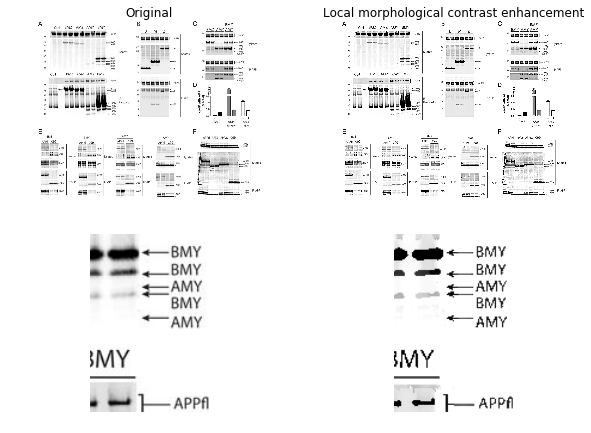

In [18]:

from skimage.filters.rank import enhance_contrast

noisy_image = data.imread('Comp.jpg',as_grey=True)

enh = enhance_contrast(noisy_image, disk(5))

fig, ax = plt.subplots(2, 2, figsize=[10, 7], sharex='row', sharey='row')
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(noisy_image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(enh, cmap=plt.cm.gray)
ax2.set_title('Local morphological contrast enhancement')
ax2.axis('off')
ax2.set_adjustable('box-forced')

ax3.imshow(noisy_image[200:350, 350:450], cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_adjustable('box-forced')

ax4.imshow(enh[200:350, 350:450], cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_adjustable('box-forced')



<div class="document">
<p>The percentile version of the local morphological contrast enhancement uses
percentile <em>p0</em> and <em>p1</em> instead of the local minimum and maximum.</p>
</div>


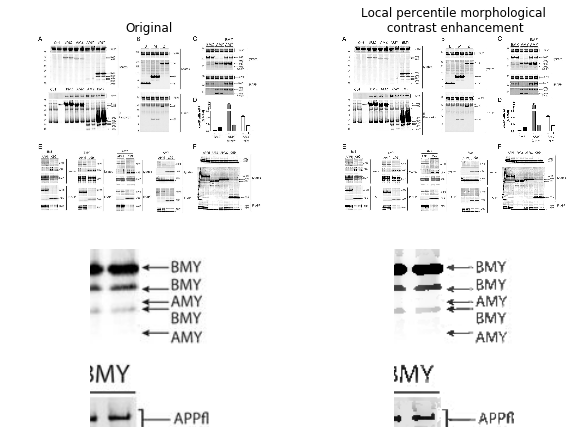

In [19]:

from skimage.filters.rank import enhance_contrast_percentile

noisy_image = data.imread('Comp.jpg',as_grey=True)

penh = enhance_contrast_percentile(noisy_image, disk(5), p0=.1, p1=.9)

fig, ax = plt.subplots(2, 2, figsize=[10, 7], sharex='row', sharey='row')
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(noisy_image, cmap=plt.cm.gray)
ax1.set_title('Original')

ax2.imshow(penh, cmap=plt.cm.gray)
ax2.set_title('Local percentile morphological\n contrast enhancement')

ax3.imshow(noisy_image[200:350, 350:450], cmap=plt.cm.gray)

ax4.imshow(penh[200:350, 350:450], cmap=plt.cm.gray)

for ax in ax.ravel():
    ax.axis('off')
    ax.set_adjustable('box-forced')



<div class="document" id="image-threshold">
<h1 class="title">Image threshold</h1>
<p>The Otsu threshold [1] method can be applied locally using the local gray-
level distribution. In the example below, for each pixel, an &quot;optimal&quot;
threshold is determined by maximizing the variance between two classes of
pixels of the local neighborhood defined by a structuring element.</p>
<p>The example compares the local threshold with the global threshold
<cite>skimage.filters.threshold_otsu</cite>.</p>
<div class="note">
<p class="first admonition-title">Note</p>
<p class="last">Local is much slower than global thresholding. A function for global Otsu
thresholding can be found in : <cite>skimage.filters.threshold_otsu</cite>.</p>
</div>
<table class="docutils footnote" frame="void" id="id1" rules="none">
<colgroup><col class="label" /><col /></colgroup>
<tbody valign="top">
<tr><td class="label">[4]</td><td><a class="reference external" href="http://en.wikipedia.org/wiki/Otsu's_method">http://en.wikipedia.org/wiki/Otsu's_method</a></td></tr>
</tbody>
</table>
</div>


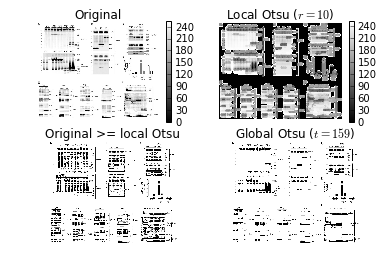

In [21]:

from skimage.filters.rank import otsu
from skimage.filters import threshold_otsu

p8 = data.imread('Comp.jpg',as_grey=True)

radius = 10
selem = disk(radius)

# t_loc_otsu is an image
t_loc_otsu = otsu(p8, selem)
loc_otsu = p8 >= t_loc_otsu

# t_glob_otsu is a scalar
t_glob_otsu = threshold_otsu(p8)
glob_otsu = p8 >= t_glob_otsu

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()

fig.colorbar(ax1.imshow(p8, cmap=plt.cm.gray), ax=ax1)
ax1.set_title('Original')

fig.colorbar(ax2.imshow(t_loc_otsu, cmap=plt.cm.gray), ax=ax2)
ax2.set_title('Local Otsu ($r=%d$)' % radius)

ax3.imshow(p8 >= t_loc_otsu, cmap=plt.cm.gray)
ax3.set_title('Original >= local Otsu' % t_glob_otsu)

ax4.imshow(glob_otsu, cmap=plt.cm.gray)
ax4.set_title('Global Otsu ($t=%d$)' % t_glob_otsu)

for ax in ax.ravel():
    ax.axis('off')
    ax.set_adjustable('box-forced')



<div class="document">
<p>The following example shows how local Otsu thresholding handles a global level
shift applied to a synthetic image.</p>
</div>


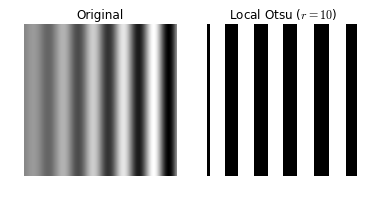

In [22]:

n = 100
theta = np.linspace(0, 10 * np.pi, n)
x = np.sin(theta)
m = (np.tile(x, (n, 1)) * np.linspace(0.1, 1, n) * 128 + 128).astype(np.uint8)

radius = 10
t = rank.otsu(m, disk(radius))

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

ax1.imshow(m)
ax1.set_title('Original')
ax1.axis('off')
ax1.set_adjustable('box-forced')

ax2.imshow(m >= t, interpolation='nearest')
ax2.set_title('Local Otsu ($r=%d$)' % radius)
ax2.axis('off')
ax2.set_adjustable('box-forced')



<div class="document" id="image-morphology">
<h1 class="title">Image morphology</h1>
<p>Local maximum and local minimum are the base operators for gray-level
morphology.</p>
<div class="note">
<p class="first admonition-title">Note</p>
<p class="last"><cite>skimage.dilate</cite> and <cite>skimage.erode</cite> are equivalent filters (see below for
comparison).</p>
</div>
<p>Here is an example of the classical morphological gray-level filters: opening,
closing and morphological gradient.</p>
</div>


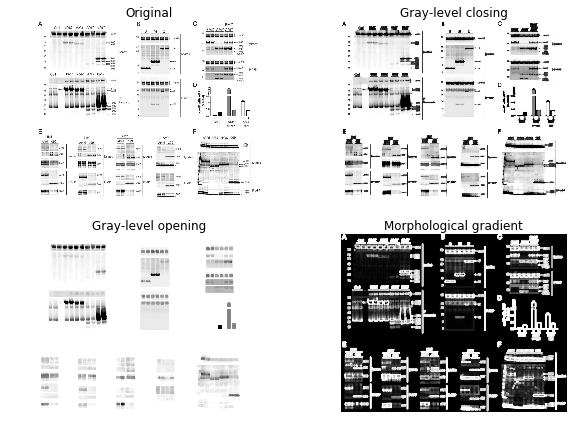

In [23]:

from skimage.filters.rank import maximum, minimum, gradient

noisy_image = data.imread('Comp.jpg',as_grey=True)

closing = maximum(minimum(noisy_image, disk(5)), disk(5))
opening = minimum(maximum(noisy_image, disk(5)), disk(5))
grad = gradient(noisy_image, disk(5))

# display results
fig, ax = plt.subplots(2, 2, figsize=[10, 7], sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(noisy_image, cmap=plt.cm.gray)
ax1.set_title('Original')

ax2.imshow(closing, cmap=plt.cm.gray)
ax2.set_title('Gray-level closing')

ax3.imshow(opening, cmap=plt.cm.gray)
ax3.set_title('Gray-level opening')

ax4.imshow(grad, cmap=plt.cm.gray)
ax4.set_title('Morphological gradient')

for ax in ax.ravel():
    ax.axis('off')
    ax.set_adjustable('box-forced')


<div class="document" id="feature-extraction">
<h1 class="title">Feature extraction</h1>
<p>Local histograms can be exploited to compute local entropy, which is related to
the local image complexity. Entropy is computed using base 2 logarithm i.e. the
filter returns the minimum number of bits needed to encode local gray-level
distribution.</p>
<p><cite>skimage.rank.entropy</cite> returns the local entropy on a given structuring
element. The following example shows applies this filter on 8- and 16-bit
images.</p>
<div class="note">
<p class="first admonition-title">Note</p>
<p class="last">to better use the available image bit, the function returns 10x entropy for
8-bit images and 1000x entropy for 16-bit images.</p>
</div>
</div>


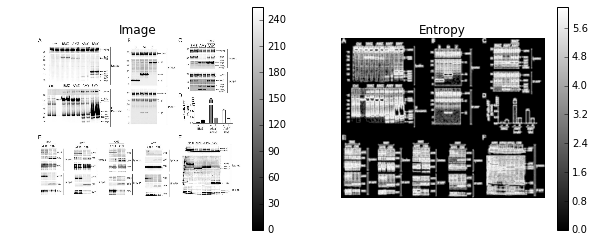

In [24]:

from skimage import data
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
import matplotlib.pyplot as plt

image = data.imread('Comp.jpg',as_grey=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

fig.colorbar(ax1.imshow(image, cmap=plt.cm.gray), ax=ax1)
ax1.set_title('Image')
ax1.axis('off')
ax1.set_adjustable('box-forced')

fig.colorbar(ax2.imshow(entropy(image, disk(5)), cmap=plt.cm.gray), ax=ax2)
ax2.set_title('Entropy')
ax2.axis('off')
ax2.set_adjustable('box-forced')



<div class="document" id="implementation">
<h1 class="title">Implementation</h1>
<p>The central part of the <cite>skimage.rank</cite> filters is build on a sliding window
that updates the local gray-level histogram. This approach limits the algorithm
complexity to O(n) where n is the number of image pixels. The complexity is
also limited with respect to the structuring element size.</p>
<p>In the following we compare the performance of different implementations
available in <cite>skimage</cite>.</p>
</div>


In [25]:

from time import time

from scipy.ndimage import percentile_filter
from skimage.morphology import dilation
from skimage.filters.rank import median, maximum


def exec_and_timeit(func):
    """Decorator that returns both function results and execution time."""
    def wrapper(*arg):
        t1 = time()
        res = func(*arg)
        t2 = time()
        ms = (t2 - t1) * 1000.0
        return (res, ms)
    return wrapper


@exec_and_timeit
def cr_med(image, selem):
    return median(image=image, selem=selem)


@exec_and_timeit
def cr_max(image, selem):
    return maximum(image=image, selem=selem)


@exec_and_timeit
def cm_dil(image, selem):
    return dilation(image=image, selem=selem)


@exec_and_timeit
def ndi_med(image, n):
    return percentile_filter(image, 50, size=n * 2 - 1)



<div class="document">
<p>Comparison between</p>
<ul class="simple">
<li><cite>filters.rank.maximum</cite></li>
<li><cite>morphology.dilate</cite></li>
</ul>
<p>on increasing structuring element size:</p>
</div>


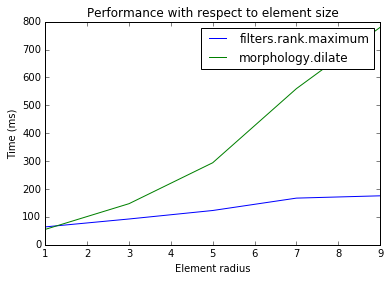

In [26]:

a = data.imread('Comp.jpg',as_grey=True)

rec = []
e_range = range(1, 10, 2)
for r in e_range:
    elem = disk(r + 1)
    rc, ms_rc = cr_max(a, elem)
    rcm, ms_rcm = cm_dil(a, elem)
    rec.append((ms_rc, ms_rcm))

rec = np.asarray(rec)

fig, ax = plt.subplots()
ax.set_title('Performance with respect to element size')
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Element radius')
ax.plot(e_range, rec)
ax.legend(['filters.rank.maximum', 'morphology.dilate'])



<div class="document">
<p>and increasing image size:</p>
</div>


In [ ]:

r = 9
elem = disk(r + 1)

rec = []
s_range = range(100, 1000, 100)
for s in s_range:
    a = (np.random.random((s, s)) * 256).astype(np.uint8)
    (rc, ms_rc) = cr_max(a, elem)
    (rcm, ms_rcm) = cm_dil(a, elem)
    rec.append((ms_rc, ms_rcm))

rec = np.asarray(rec)

fig, ax = plt.subplots()
ax.set_title('Performance with respect to image size')
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Image size')
ax.plot(s_range, rec)
ax.legend(['filters.rank.maximum', 'morphology.dilate'])




<div class="document">
<p>Comparison between:</p>
<ul class="simple">
<li><cite>filters.rank.median</cite></li>
<li><cite>scipy.ndimage.percentile</cite></li>
</ul>
<p>on increasing structuring element size:</p>
</div>


In [ ]:

a = data.camera()

rec = []
e_range = range(2, 30, 4)
for r in e_range:
    elem = disk(r + 1)
    rc, ms_rc = cr_med(a, elem)
    rndi, ms_ndi = ndi_med(a, r)
    rec.append((ms_rc, ms_ndi))

rec = np.asarray(rec)

fig, ax = plt.subplots()
ax.set_title('Performance with respect to element size')
ax.plot(e_range, rec)
ax.legend(['filters.rank.median', 'scipy.ndimage.percentile'])
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Element radius')



<div class="document">
<p>Comparison of outcome of the three methods:</p>
</div>


In [ ]:

fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, sharey=True)
ax0.set_title('filters.rank.median')
ax0.imshow(rc)
ax0.axis('off')
ax0.set_adjustable('box-forced')
ax1.set_title('scipy.ndimage.percentile')
ax1.imshow(rndi)
ax1.axis('off')
ax1.set_adjustable('box-forced')



<div class="document">
<p>and increasing image size:</p>
</div>


In [ ]:

r = 9
elem = disk(r + 1)

rec = []
s_range = [100, 200, 500, 1000]
for s in s_range:
    a = (np.random.random((s, s)) * 256).astype(np.uint8)
    (rc, ms_rc) = cr_med(a, elem)
    rndi, ms_ndi = ndi_med(a, r)
    rec.append((ms_rc, ms_ndi))

rec = np.asarray(rec)

fig, ax = plt.subplots()
ax.set_title('Performance with respect to image size')
ax.plot(s_range, rec)
ax.legend(['filters.rank.median', 'scipy.ndimage.percentile'])
ax.set_ylabel('Time (ms)')
ax.set_xlabel('Image size')



<div class="document">
</div>


In [ ]:

plt.show()
